In [14]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

path = '/Users/roberthart/Desktop'
colors = sns.color_palette("colorblind")
colors_hex = colors.as_hex()
plt.rcParams['font.family'] = 'Times New Roman'
training = pd.read_csv(f'{path}/final_figures/training_standardized.csv')
samples = pd.read_csv(f'{path}/final_figures/samples_standardized.csv')

In [15]:
training_samples = pd.concat([training, samples], ignore_index=True)
training_samples['Dataset'] = ['training'] * len(training) + ['samples'] * len(samples)

In [16]:
training_samples = training_samples.melt(id_vars=['percent', 'Dataset'], value_vars=['BlueGray', 'DarkBrown', 'Green', 'LightBrown'], var_name='variable', value_name='value')

<Figure size 716x537 with 0 Axes>

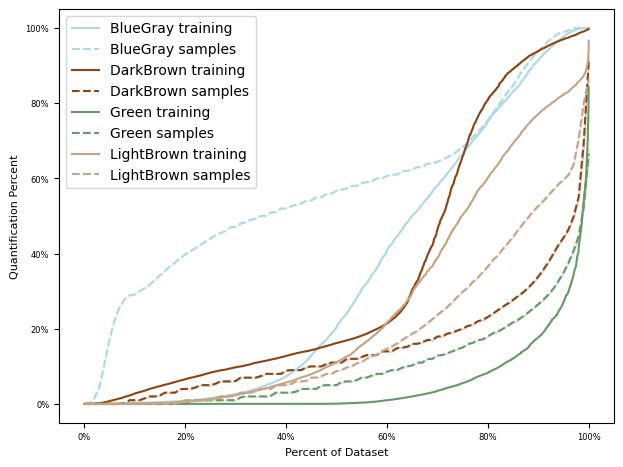

In [17]:
colors = {'BlueGray': '#ADD8E6', 'DarkBrown': '#8B4513', 'Green': '#669966', 'LightBrown': '#C4A484'}

# Define line styles for each dataset
line_styles = {"training": "-", "samples": "--"}
plt.figure(figsize=(7.16, 5.37))

# Plot
plt.figure(figsize=(7.16, 5.37))
for variable in training_samples['variable'].unique():
    for dataset in training_samples['Dataset'].unique():
        subset = training_samples[(training_samples['variable'] == variable) & (training_samples['Dataset'] == dataset)]
        sns.lineplot(data=subset, x='percent', y='value', label=f'{variable} {dataset}',
                     color=colors[variable], linestyle=line_styles[dataset])

plt.xlabel('Percent of Dataset', fontsize=8)  # Replace 'New X Axis Name' with your desired name for the x-axis
plt.ylabel('Quantification Percent', fontsize=8)  # Replace 'New Y Axis
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.tick_params(axis='both', which='major', labelsize=6)

plt.savefig('color_dist_line_graph.png', dpi=600)
plt.show()

